In [2]:
from math import exp
from matplotlib import pyplot as plt
import numpy as np

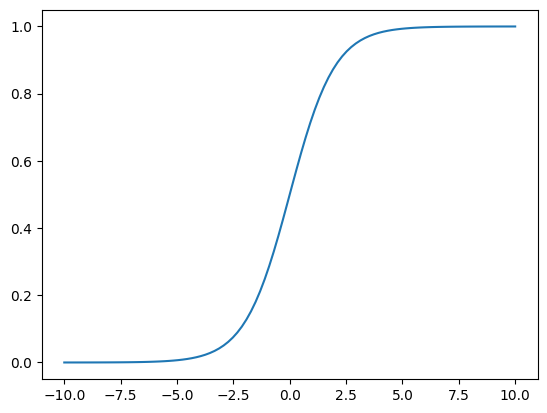

In [3]:
sigmoid = lambda z: 1 / (1 + exp(-z))

x = np.linspace(-10, 10, 100)
outs = [sigmoid(i) for i in x]

plt.plot(x, outs)

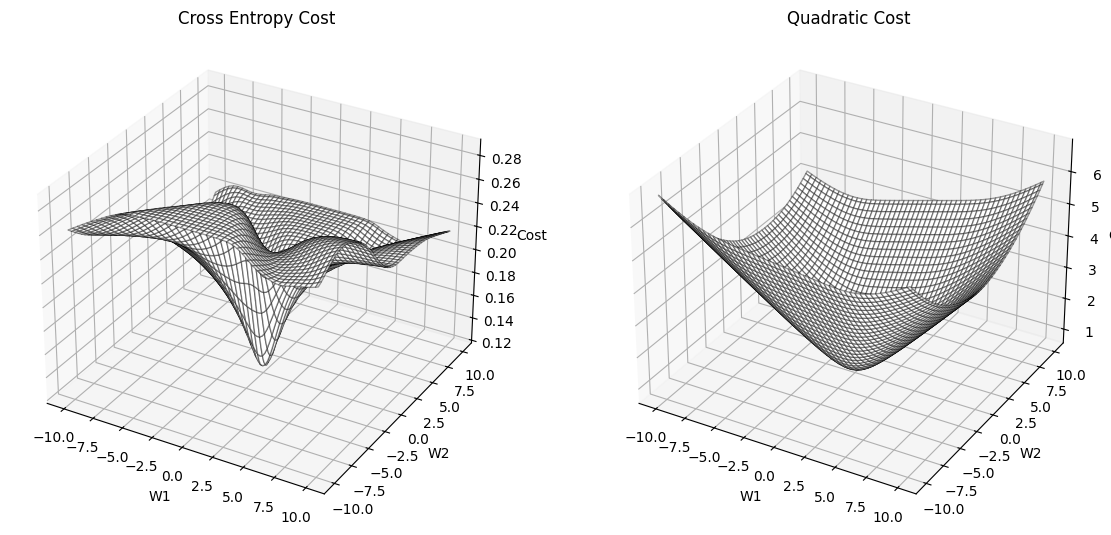

In [28]:
# recreate figure 5 in teh glorot paper

from matplotlib import colors


sigmoid = lambda z: 1 / (1 + np.exp(-z))

w1 = np.linspace(-10, 10, 100)
w2 = np.linspace(-10, 10, 100)
w1, w2 = np.meshgrid(w1, w2)

x = np.random.randn(100, 1)
y = np.random.randint(0, 2, (100, 1))

def quadratic_cost(w1, w2, x, y):
    z = w1 * x + w2
    p = sigmoid(z)  
    cost = 0.5  * (p - y) ** 2
    return cost


def log_likelihood_cost(w1, w2, x, y):
    z = w1 * x + w2
    p = sigmoid(z)
    cost = -y * np.log(p) - (1 - y) * np.log(1 - p)
    return cost


quad_costs = np.mean([quadratic_cost(w1, w2, x[i], y[i]) for i in range(len(x))], axis=0)
log_costs = np.mean([log_likelihood_cost(w1, w2, x[i], y[i]) for i in range(len(x))], axis=0)

# Plotting the cost functions
fig = plt.figure(figsize=(14, 7))

# Plot Cross Entropy Cost
ax1 = fig.add_subplot(121, projection='3d')
# no fill only lines
ax1.plot_surface(w1, w2, quad_costs, edgecolor=colors.to_rgba("black", 0.4), facecolor='w')
ax1.set_title('Cross Entropy Cost')
ax1.set_xlabel('W1')
ax1.set_ylabel('W2')
ax1.set_zlabel('Cost')


# Plot Quadratic Cost
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(w1, w2, log_costs, edgecolor=colors.to_rgba("black", 0.4), facecolor='w')
ax2.set_title('Quadratic Cost')
ax2.set_xlabel('W1')
ax2.set_ylabel('W2')
ax2.set_zlabel('Cost')

plt.show()